In [ ]:
import pandas as pd,numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!git clone https://github.com/Souradeep2233/UAV-AIOT_COLLAB.git


Cloning into 'UAV-AIOT_COLLAB'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
data=pd.read_csv("/content/cleaned_dataset.csv")
data

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,sealevelpressure,conditions
0,23.0,16.0,19.1,23.0,16.0,19.1,15.1,79.3,0.000,0.0,0.00,1018.6,Clear
1,23.0,14.0,17.9,23.0,14.0,17.9,14.6,82.3,0.000,0.0,0.00,1017.3,cloudy
2,24.0,14.0,18.4,24.0,14.0,18.4,14.1,77.6,0.000,0.0,0.00,1015.9,Clear
3,23.0,13.0,17.6,23.0,13.0,17.6,13.4,78.0,0.000,0.0,0.00,1016.6,Clear
4,24.0,13.0,17.9,24.0,13.0,17.9,13.0,75.7,0.000,0.0,0.00,1015.8,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,26.0,16.0,21.3,26.0,16.0,21.3,18.2,83.5,0.000,0.0,0.00,1017.0,cloudy
391,26.0,17.8,21.1,26.0,17.8,21.1,17.3,79.9,0.000,0.0,0.00,1016.4,cloudy
392,25.0,18.0,20.7,25.0,18.0,20.7,17.2,81.4,0.000,0.0,0.00,1016.5,cloudy
393,23.0,17.0,19.4,23.0,17.0,19.4,17.4,88.3,0.988,100.0,4.17,1018.9,rainy


In [ ]:
data.isna().sum()

tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
sealevelpressure    0
conditions          0
dtype: int64

In [ ]:
import sklearn
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
data=data[['tempmax','tempmin','dew','humidity','precip','sealevelpressure','conditions']]
data

,tempmax,tempmin,dew,humidity,precip,sealevelpressure,conditions
0,23.0,16.0,15.1,79.3,0.000,1018.6,Clear
1,23.0,14.0,14.6,82.3,0.000,1017.3,cloudy
2,24.0,14.0,14.1,77.6,0.000,1015.9,Clear
3,23.0,13.0,13.4,78.0,0.000,1016.6,Clear
4,24.0,13.0,13.0,75.7,0.000,1015.8,Clear
...,...,...,...,...,...,...,...
390,26.0,16.0,18.2,83.5,0.000,1017.0,cloudy
391,26.0,17.8,17.3,79.9,0.000,1016.4,cloudy
392,25.0,18.0,17.2,81.4,0.000,1016.5,cloudy
393,23.0,17.0,17.4,88.3,0.988,1018.9,rainy


In [ ]:
y=data['conditions']
x=data[['tempmax','tempmin','dew','humidity','precip','sealevelpressure']]



In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.80, test_size=0.20, random_state=101)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# enc=OneHotEncoder()
# y_train=pd.DataFrame(y_train)
# y_test=pd.DataFrame(y_test)
# y_train=enc.fit_transform(y_train.to_numpy().reshape(-1,1)).toarray()
# y_test=enc.fit_transform(y_test.to_numpy().reshape(-1,1)).toarray()
#encoding train labels 
encoder.fit(y_train)
y_train = encoder.transform(y_train)

# encoding test labels 
encoder.fit(y_test)
y_test = encoder.transform(y_test)

In [ ]:
y_train

array([0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0,
       0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 2, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0,
       2, 1, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1,
       0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0,
       0, 1, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 1,
       2, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2,
       1, 2, 0, 2, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 1,
       1, 0, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 2,
       0, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0,

In [ ]:
y_train.shape

(316,)

**['Clear','Cloudy','Rainy']**

In [ ]:
#Checking accuracy over poly
poly = svm.SVC(kernel='poly', degree=8, C=19).fit(x_train, y_train)
poly_pred = poly.predict(x_test)
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  78.48
F1 (Polynomial Kernel):  78.13


In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=.000005, C=45.1).fit(x_train, y_train)

rbf_pred = rbf.predict(x_test)
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  82.28
F1 (RBF Kernel):  81.95


In [ ]:
linear = svm.SVC(kernel='linear',gamma=.0005, C=45.1).fit(x_train, y_train)

linear_pred = rbf.predict(x_test)
linear_accuracy = accuracy_score(y_test, linear_pred)
linear_f1 = f1_score(y_test, linear_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  82.28
F1 (RBF Kernel):  81.95


In [ ]:
sigmoid = svm.SVC(kernel='sigmoid',gamma=.00099, C=45.1).fit(x_train, y_train)

sigmoid_pred = rbf.predict(x_test)
linear_accuracy = accuracy_score(y_test, sigmoid_pred)
linear_f1 = f1_score(y_test, sigmoid_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  82.28
F1 (RBF Kernel):  81.95


In [ ]:
svc_eval=pd.read_csv("/content/SVC_eval.csv")
svc_eval

,SVC_MODELS,Eval,Metrics
0,poly,78.48,Accuracy
1,poly,78.13,F1_Score
2,rbf,82.28,Accuracy
3,rbf,81.95,F1_Score
4,linear,82.28,Accuracy
5,linear,81.95,F1_Score
6,sigmoid,82.28,Accuracy
7,sigmoid,81.95,F1_Score


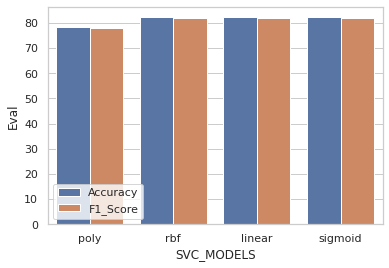

In [ ]:
sns.barplot(x='SVC_MODELS',y='Eval',hue='Metrics',data=svc_eval)
plt.legend(loc='lower left')